# Limb darkening removal from HMI SHARP CEA cutoffs

#### We are using http://articles.adsabs.harvard.edu/pdf/1977SoPh...51...25P as reference with equation 11 and following coeficients


0.32519, 1.26432, -1.44591, 1.55723, -0.87415, 0.173333

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pf
import os
import glob
# This makes nice big plots
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

In [9]:
# Create array for holding limb darkening coef
coef_limb_hmi = np.array(
    [0.32519, 1.26432, -1.44591, 1.55723, -0.87415, 0.173333])
# Load data paths
data_dir_CEA = os.path.abspath(
    "/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA")
data_list_CEA = sorted(glob.glob(os.path.join(data_dir_CEA, '*continuum*')))

Text(0.5, 1.0, 'Limb dark function for HMI Fe line')

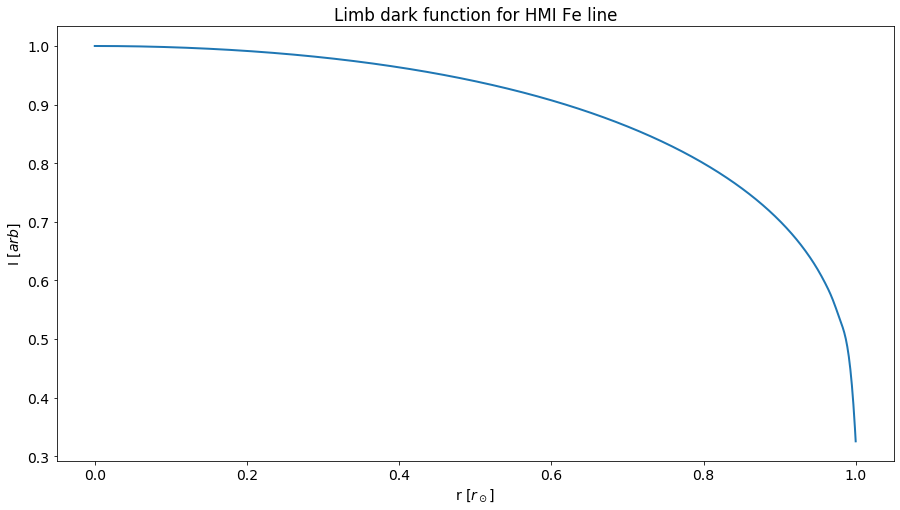

In [15]:
def limb_dark(r, koef=coef_limb_hmi):
    # r is normalized distance from center [0,1]
    mu = np.sqrt(1-r**2)
    return koef[0]+koef[1]*mu+koef[2]*mu**2+koef[3]*mu**3+koef[4]*mu**4+koef[5]*mu**5

# but lets be smart, why calculate every time
# lets create a spline
r_limb_calc = np.linspace(0,1,100)
i_limb_calc = limb_dark(r_limb_calc)

from scipy.interpolate import interp1d

i_limb = interp1d(r_limb_calc, i_limb_calc, kind='cubic')

#now call this as function of distance from center! i_limb(0.2)
plt.figure(1)
plt.plot(np.linspace(0,1,1000),i_limb(np.linspace(0,1,1000)))
plt.xlabel(r'r $[r_\odot]$')
plt.ylabel(r'I $[arb]$')
plt.title('Limb dark function for HMI Fe line')

### We have our limb darkening function ready, lets load data and correct it

In [48]:
filename_limb = data_list_CEA[0]
filename_cent = data_list_CEA[600]

limb_data = pf.open(filename_limb)
limb_data.verify('silentfix')


cent_data = pf.open(filename_cent)
cent_data.verify('silentfix')



71.252243
72.695999


degree


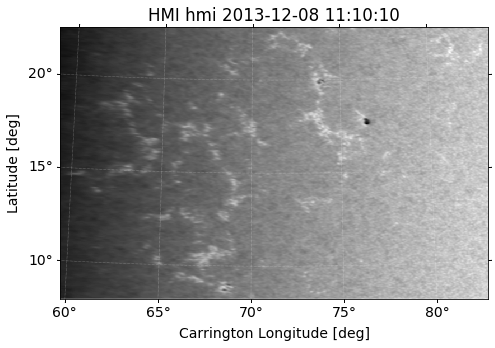